# Bias types

author: steeve.laquitaine@epfl.ch  
last modified: 17-07-2023  
status: OK  
regression: None  



### Setup

Create or activate env `npx_10m_384ch_unit_classes`

In [1]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns 

proj_path = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/"
os.chdir(proj_path)

from src.nodes.postpro.cell_matching import get_SpikeInterface_matching_object, match_sorted_to_true_neuropixels_2023_02_19
from src.nodes.utils import get_config
from src.nodes.postpro.cell_matching import get_SpikeInterface_matching_object, match_sorted_to_true_neuropixels_2023_02_19
from src.nodes.postpro.feateng import (add_firing_rates)


# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_02_19"

LOW_RATE_CEILING = 0.2  # max firing rate where negative proba change is observed in "bias plot"

# GET RUN CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# set Kilosort sorted spikes and cells path
KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]

# set ground truth spikes and cells path
GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

2023-07-17 20:16:29,982 - root - utils.py - get_config - INFO - Reading experiment config.
2023-07-17 20:16:30,007 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
KS3_SORTING_PATH

'/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/cns_2023/sorting/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/kilosort3'

In [3]:
# are the sorted units overmerged (have non zero agreement scores with other true units)
# get matching object
MatchingObject = get_SpikeInterface_matching_object(GT_SORTING_PATH, KS3_SORTING_PATH)

We sort each row in descending order. The columns are not labelled as the raw ground truth anymore but become labelled as best match ground truth to the worst match.

In [4]:
# get agreement scores for all
overmerging_matx = MatchingObject.agreement_scores.T

# sort each row such that the row with the highest score be first, column order stays untouched
argmax = overmerging_matx.T.idxmax().to_frame()
max = overmerging_matx.T.max()
descending_ix = np.argsort(max)[::-1]
overmerging_matx_2 = overmerging_matx.iloc[descending_ix]

# repeat for columns, row order stays untouched
argmax = overmerging_matx_2.idxmax().to_frame()
max = overmerging_matx_2.max()
descending_ix = np.argsort(max)[::-1]
overmerging_matx_2 = overmerging_matx_2.iloc[:, descending_ix]
overmerging_matx_2

,3891529,891776,4070895,2173940,1808832,2113524,2121825,1428671,1684667,1429004,...,3649456,1618654,1653839,1669980,1700189,3889514,3902975,2651147,3783354,24768
112,0.970588,0.000924,0.001759,0.000000,0.000987,0.001508,0.001049,0.0,0.000000,0.001201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.001532,0.970190,0.000375,0.000475,0.000584,0.001316,0.001232,0.0,0.000000,0.001463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.001324,0.001139,0.962309,0.000000,0.001237,0.000489,0.000889,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.000000,0.000000,0.000000,0.936170,0.001073,0.000000,0.000593,0.0,0.000000,0.002037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.001938,0.001443,0.001603,0.000000,0.913196,0.000000,0.000324,0.0,0.031085,0.000530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### True unit classes

In [5]:
# set detection threshold
det_thresh = 0.8
chance = 0.1

# create masks
mask_above_det = overmerging_matx_2 >= det_thresh
mask_below_chance = overmerging_matx_2 <= chance
mask_in_between = np.logical_and(overmerging_matx_2 < det_thresh,  overmerging_matx_2 > chance)
mask_entirely_missed = overmerging_matx_2 == 0

# implement tree to classify ground truths
# find ground truth (cols) with one mask_above_det=True and other mask_below_chance = True 

gt_classes = []
gt_oversplitted = []
for gt_i in range(overmerging_matx_2.shape[1]):

    # check if that ground truth has one sorted unit above detection threshold
    if any(mask_above_det.iloc[:, gt_i]):

        # get this ground truth detection stata
        is_detected = mask_above_det.iloc[:, gt_i]
        detected_loc = np.where(is_detected)[0]
        detected_ix = is_detected.index[detected_loc]

        # get other cells
        other_cells_ix = is_detected.drop(index=detected_ix).index

        # get this ground truth below chance stata
        is_below_chance = mask_below_chance.iloc[:, gt_i]

        # check if all other sorted units are below chance
        if all(is_below_chance.loc[other_cells_ix]):
            gt_classes.append("well_detected")
        else:
            gt_classes.append("well_detected_plus_correlated_units")

    # case where ground truth matches only one sorted unit
    # with a score b/w detection and chance and 
    # other units below chance
    # no score are above detection  
    elif (sum(mask_in_between.iloc[:, gt_i]) == 1) and (any(mask_above_det.iloc[:, gt_i])==False):
        gt_classes.append("poorly_detected")
    
    # case a true unit is associated is a sorted unit with score
    # between detection and chance that is associated with other
    # true units with scores between detection and chances
    elif (sum(mask_in_between.iloc[:, gt_i]) > 1):        
        gt_classes.append("oversplitted")
        
    # check that all sorted units have scores below          
    # chance
    elif all(mask_below_chance.iloc[:, gt_i]):
        if all(mask_entirely_missed.iloc[:, gt_i]):
            gt_classes.append("missed")
        else:
            gt_classes.append("below_chance")

### Overmerged true units

A true unit is overmerged (with other true units) if he has at least one sorted units with a score between detection and chance that also has a score between detection and chance with another true unit.

In [6]:
# if one of its sorted units with score between 
# detection and chance has also a score between
# detection and chance with another true unit
# the true unit is overmerged (with another true unit)
true_units_loc = np.where(mask_in_between.sum(axis=0) >= 1)[0]
true_units = mask_in_between.columns[true_units_loc]
gt_overmerged = dict()

for gt_i in range(len(true_units_loc)):
    
    target_true_units_mx = mask_in_between.iloc[:, true_units_loc]

    sorted_u = np.where(target_true_units_mx.iloc[:, gt_i])[0]

    # check overmerged (that sorted unit merges other true units)
    if any(mask_in_between.iloc[sorted_u,:].sum(axis=1) > 1):    
        overmerged_bool = mask_in_between.iloc[sorted_u,:].sum(axis=1)>1    
        overmerging_sorted = overmerged_bool.index[np.where(overmerged_bool)[0]].to_list()        
        gt_overmerged[true_units[gt_i]] = overmerging_sorted

# count overmerged
n_overmerged = len(gt_overmerged)

In [8]:
# what do overmerged units correspond to?
all_true_units = overmerging_matx_2.columns 
gt_classes_df = pd.DataFrame(data = gt_classes, index=all_true_units.to_list())
gt_classes_df.loc[gt_overmerged.keys(),:] 

,0
1684667,oversplitted
1429004,poorly_detected
1816718,oversplitted
2076919,oversplitted
487975,poorly_detected
281388,poorly_detected
394076,poorly_detected
1817280,oversplitted
142759,poorly_detected
355657,poorly_detected


### This part is manual for now: need to recalculate each class count everytime

In [27]:
count_by_class = dict(Counter(gt_classes))
count_by_class

{'well_detected': 7,
 'poorly_detected': 28,
 'oversplitted': 8,
 'below_chance': 414,
 'missed': 77}

In [28]:
print(n_overmerged)

# edit (semi-automatique)
count_by_class["well_detected_plus_correlated_units"] = 0

count_by_class

13


{'well_detected': 7,
 'poorly_detected': 28,
 'oversplitted': 8,
 'below_chance': 414,
 'missed': 77,
 'well_detected_plus_correlated_units': 0}

In [29]:
# count each class and plot histo
# build histogram
data_df = pd.DataFrame(
    {
        "cell count": [
            count_by_class["well_detected"],
            count_by_class["well_detected_plus_correlated_units"],
            count_by_class["poorly_detected"] - n_overmerged,
            n_overmerged,
            count_by_class["oversplitted"],
            count_by_class["below_chance"],
            count_by_class["missed"],
        ],
    },
    index=["well detected", "well detected + correlated unit", "poorly detected", "overmerged", "oversplitted", "below chance","missed"],
    # index=["well detected", "poorly detected", "overmerged", "oversplitted", "below chance", "missed"],
    # index=["well detected", "poorly detected", "oversplitted", "below chance", "missed"],
)

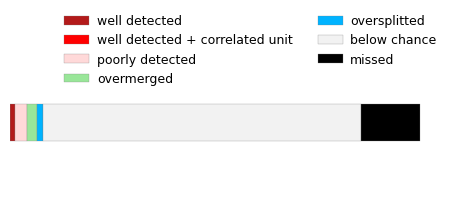

In [30]:
# set figure
fig, axis = plt.subplots(1, 1, figsize=(5, 2))

# set plot legend
colors = [[0.7, 0.1, 0.1], "r", [1, 0.85, 0.85], [0.6, 0.9, 0.6], [0, 0.7, 1], [0.95,0.95,0.95], "k"]


# plot
ax = (data_df).T.plot.barh(
    ax=axis,
    stacked=True,
    color=colors,
    width=0.2,
    edgecolor=[0.5,0.5,0.5],
    linewidth=0.2,
)

# set axis legend
ax.spines[["left", "right", "top","bottom"]].set_visible(False)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(True)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_xlabel("true units (count)", fontsize=9)

ax.legend(ncol=2,
    bbox_to_anchor=(0.1, 0.7),
    frameon=False,
    fontsize=9,
    handletextpad=0.6,
)
# ax.tick_params(axis="both", which="major", labelsize=9)
plt.tight_layout()

# annotate bars with the number of each class
# for p_i, patch in enumerate(ax.patches):
#     width, height = patch.get_width(), patch.get_height()
#     x, y = patch.get_xy()
#     ax.text(
#         x + width / 2,
#         y + height+0.05 ,
#         "{:.0f}".format(width),
#         horizontalalignment="center",
#         verticalalignment="center",
#         color="k",
#     )

plt.savefig("figures/all_unit_accuracy_classes.pdf")

In [31]:
data_df

,cell count
well detected,7
well detected + correlated unit,0
poorly detected,15
overmerged,13
oversplitted,8
below chance,414
missed,77


In [33]:
data_df.sum()

cell count    534
dtype: int64

In [34]:
n_overmerged

13

## Plot sorted score matrix

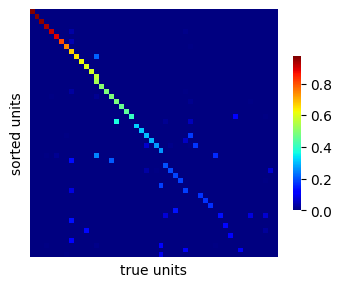

In [36]:
# plot (50 first true and ground truth units)
mx_to_plot = overmerging_matx_2.iloc[:50,:50].values

fig, axis = plt.subplots(figsize=(4,4))

ax = sns.heatmap(mx_to_plot, cmap="jet", cbar_kws={"shrink": 0.5}, yticklabels=False, xticklabels=False);
plt.xlabel("true units");
plt.ylabel("sorted units");
ax.set_aspect("equal")
plt.savefig("figures/matching_heatmap.pdf")

In [37]:
pd.DataFrame(mx_to_plot).iloc[:, 10:]

,10,11,12,13,14,15,16,17,18,19,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.001359,0.000000,0.000686,0.002322,0.000495,0.000424,0.000399,0.001520,...,0.001220,0.000000,0.000000,0.001779,0.000000,0.000000,0.000392,0.000000,0.000000,0.000000
1,0.001783,0.000000,0.001156,0.000000,0.001212,0.000293,0.000000,0.001094,0.001383,0.002773,...,0.000351,0.000000,0.000000,0.000758,0.000000,0.000000,0.002044,0.000000,0.000000,0.000000
2,0.000552,0.000000,0.001252,0.000000,0.000000,0.000415,0.001421,0.000573,0.001055,0.000899,...,0.001082,0.000000,0.000000,0.000610,0.000000,0.000000,0.000515,0.000000,0.000000,0.000000
3,0.000802,0.000000,0.000000,0.000000,0.000000,0.000542,0.002370,0.000845,0.001502,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001136,0.000000,0.001235,0.000000,0.001276,0.002473,0.000446,0.001942,0.000000,0.002161,...,0.003740,0.000000,0.000000,0.001215,0.000000,0.000581,0.002166,0.000000,0.000000,0.000585
5,0.000893,0.000000,0.000986,0.000000,0.000366,0.003532,0.000000,0.000459,0.001290,0.002392,...,0.001316,0.000000,0.001498,0.000000,0.000000,0.000000,0.001265,0.000000,0.000000,0.000000
6,0.000377,0.000533,0.000820,0.003401,0.000318,0.001539,0.000444,0.000386,0.000000,0.001196,...,0.001115,0.000000,0.000000,0.000403,0.000000,0.000000,0.000718,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000855,0.000765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.215686,0.000572,0.000000,0.000000,0.000000,0.000000,0.001438,...,0.000772,0.000000,0.000000,0.000923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
# mx_to_plot = overmerging_matx.iloc[:,:20]
# # mx_to_plot = mx_to_plot.sort_values(mx_to_plot.columns[0], ascending = False)

# detection_threshold = 0.8
# min_detected_loc = []

# for s_i in range(mx_to_plot.shape[0]):
    
#     # find ground truths with agreement > detection threshold
#     locs = np.where(mx_to_plot.iloc[s_i]>detection_threshold)[0]
    
#     # case some ground truths had agreement > detection threshold
#     if not len(locs)==0:
#         min_detected_loc.append(locs[-1])
#     else:
#         # case no ground truth had agreement > detection threshold
#         min_detected_loc.append(np.nan)

# min_detected_loc = np.array(min_detected_loc)
# sorted_unit = np.arange(0,mx_to_plot.shape[0],1)


# # Above chance level
# chance_level = 0.1
# chance_min_loc = []

# for s_i in range(mx_to_plot.shape[0]):
    
#     # find first ground truth with agreement > chance level
#     locs = np.where(mx_to_plot.iloc[s_i]>chance_level)[0]
    
#     # case some ground truths had agreement > chance level
#     if not len(locs)==0:
#         chance_min_loc.append(locs[-1])
#     else:
#         # case no ground truth had agreement > chance level
#         chance_min_loc.append(np.nan)

# chance_min_loc = np.array(chance_min_loc)

## Testing squashing functions

/tmp/ipykernel_270866/1110468610.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x,np.log10(x));
/tmp/ipykernel_270866/1110468610.py:11: RuntimeWarning: divide by zero encountered in log2
  plt.plot(x,np.log2(x));
/tmp/ipykernel_270866/1110468610.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(x));


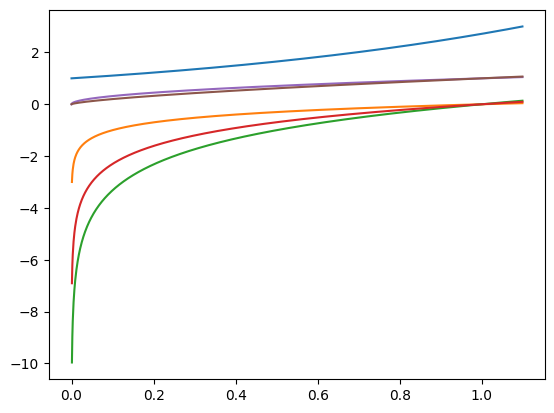

In [17]:
# softmax
def softmax(x, beta=1):
    return 1/np.exp(-beta*(x))

x = np.arange(0,1.1,0.001)
y = softmax(x)

# plots
plt.plot(x,y);
plt.plot(x,np.log10(x));
plt.plot(x,np.log2(x));
plt.plot(x,np.log(x));
plt.plot(x,np.sqrt(x)); # squashing positive
plt.plot(x,x**0.7); # squashing positive

# Repeat for sparse units

In [38]:
# get the sorted units associated with the sparse true units
match = match_sorted_to_true_neuropixels_2023_02_19(GT_SORTING_PATH, KS3_SORTING_PATH)

# get matching data
matching = match["cell_matching"]
matching = add_firing_rates(matching, GT_SORTING_PATH, KS3_SORTING_PATH, data_conf)
matching = matching.dropna(subset=['true_unit'])

# find sparse true units
sparse_true_units = matching["true_unit"][matching["true firing rate"] < LOW_RATE_CEILING].astype(int)

# find active units
active_true_units = matching["true_unit"][matching["true firing rate"] >= LOW_RATE_CEILING].astype(int)

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/cns_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/cns_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/src/nodes/postpro/cell_matching.py:235: SettingWith

In [39]:
# count classes for sparse units
sparse_gt_classes_df = gt_classes_df.loc[sparse_true_units.to_list(),:]

sparse_gt_classes = sparse_gt_classes_df[0].to_list()
sparse_count_by_class = dict(Counter(sparse_gt_classes))
sparse_count_by_class

{'below_chance': 276, 'missed': 77, 'poorly_detected': 13, 'oversplitted': 4}

In [51]:
# to edit if not correct
sparse_count_by_class["well_detected"] = 0
sparse_count_by_class

{'below_chance': 276,
 'missed': 77,
 'poorly_detected': 13,
 'oversplitted': 4,
 'well_detected': 0}

In [42]:
# count classes for active units
active_gt_classes_df = gt_classes_df.loc[active_true_units.to_list(),:]

active_gt_classes = active_gt_classes_df[0].to_list()
active_count_by_class = dict(Counter(active_gt_classes))

# to edit if not correct
active_count_by_class["well_detected_plus_correlated_units"] = 0
active_count_by_class

{'oversplitted': 4,
 'below_chance': 138,
 'poorly_detected': 15,
 'well_detected': 7,
 'well_detected_plus_correlated_units': 0}

In [43]:
# count classes for active units
active_gt_classes_df = gt_classes_df.loc[active_true_units.to_list(),:]

active_gt_classes = active_gt_classes_df[0].to_list()
active_count_by_class = dict(Counter(active_gt_classes))
active_count_by_class

{'oversplitted': 4,
 'below_chance': 138,
 'poorly_detected': 15,
 'well_detected': 7}

In [55]:
# edit if wrong
active_count_by_class["missed"] = 0
active_count_by_class

{'oversplitted': 4,
 'below_chance': 138,
 'poorly_detected': 15,
 'well_detected': 7,
 'missed': 0}

In [45]:
# manually check overmerged are all sparse
any(sparse_true_units.values == 142759)

True

In [52]:
# count each class and plot histo
# build histogram
sparse_data_df = pd.DataFrame(
    {
        "cell count": [
            sparse_count_by_class["well_detected"],
            count_by_class["well_detected_plus_correlated_units"],
            sparse_count_by_class["poorly_detected"] - n_overmerged,
            n_overmerged,
            sparse_count_by_class["oversplitted"],
            sparse_count_by_class["below_chance"],
            sparse_count_by_class["missed"],
        ],
    },
    index=["well detected", "well detected + correlated unit", "poorly detected", "overmerged", "oversplitted", "below chance", "missed"],
    # index=["poorly detected", "overmerged", "oversplitted", "below chance", "missed"],
)
sparse_data_df

,cell count
well detected,0
well detected + correlated unit,0
poorly detected,0
overmerged,13
oversplitted,4
below chance,276
missed,77


In [56]:
# count each class and plot histo
# build histogram
active_data_df = pd.DataFrame(
    {
        "cell count": [
            active_count_by_class["well_detected"],
            count_by_class["well_detected_plus_correlated_units"],
            active_count_by_class["poorly_detected"] - n_overmerged,
            n_overmerged,
            active_count_by_class["oversplitted"],
            active_count_by_class["below_chance"],
            active_count_by_class["missed"],
        ],
    },
    index=["well detected", "well detected + correlated unit", "poorly detected", "overmerged", "oversplitted", "below chance", "missed"],
)
active_data_df

,cell count
well detected,7
well detected + correlated unit,0
poorly detected,2
overmerged,13
oversplitted,4
below chance,138
missed,0


### Plot sparse classes

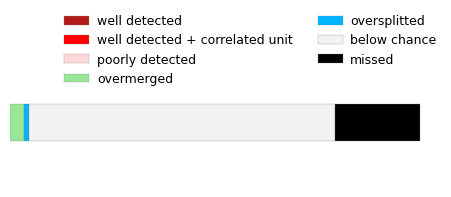

In [62]:
# set figure
fig, axis = plt.subplots(1, 1, figsize=(5, 2))

# set plot legend
#colors = ["r", [0.9, 0.7, 0.7], [0.9, 0.85, 0.85], [0.6, 0.9, 0.6], [0, 0.7, 0.8], [0.95,0.95,0.95], "k"]
colors = [[0.7, 0.1, 0.1], "r", [1, 0.85, 0.85], [0.6, 0.9, 0.6], [0, 0.7, 1], [0.95,0.95,0.95], "k"]
#colors = [[0.7, 0.1, 0.1], "r", [1, 0.85, 0.85], [0, 0.7, 1], [0.95,0.95,0.95], "k"]
# txt_colors = ["k", "w", "w", "w"]

# colors = [[1, 0.85, 0.85], [0.6, 0.9, 0.6], [0, 0.7, 1], [0.95,0.95,0.95], "k"]
# txt_colors = ["k", "w", "w", "w"]


# plot
ax = (sparse_data_df).T.plot.barh(
    ax=axis,
    stacked=True,
    color=colors,
    width=0.2,
    edgecolor=[0.5,0.5,0.5],
    linewidth=0.2,
)

# set axis legend
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(True)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
ax.set_xlabel("true units (count)", fontsize=9)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.legend(
    ncol=2,
    bbox_to_anchor=(0.1, 0.7),
    frameon=False,
    fontsize=9,
    handletextpad=0.6,
)
ax.tick_params(axis="both", which="major", labelsize=9)
plt.tight_layout()

# annotate bars with the number of each class
# for p_i, patch in enumerate(ax.patches):
#     width, height = patch.get_width(), patch.get_height()
#     x, y = patch.get_xy()
#     ax.text(
#         x + width / 2,
#         y + height+0.05 ,
#         "{:.0f}".format(width),
#         horizontalalignment="center",
#         verticalalignment="center",
#         color="k",
#     )
plt.savefig("figures/sparse_unit_accuracy_classes.pdf")

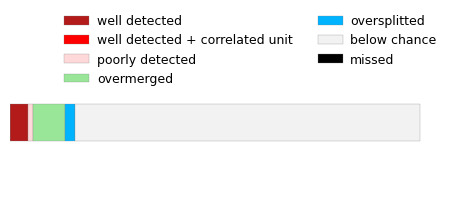

In [63]:
# set figure
fig, axis = plt.subplots(1, 1, figsize=(5, 2))

# set plot legend
# colors = [[0.7, 0.1, 0.1], "r", [1, 0.85, 0.85], [0, 0.7, 1], [0.95,0.95,0.95], "k"]
colors = [[0.7, 0.1, 0.1], "r", [1, 0.85, 0.85], [0.6, 0.9, 0.6], [0, 0.7, 1], [0.95,0.95,0.95], "k"]

# plot
ax = (active_data_df).T.plot.barh(
    ax=axis,
    stacked=True,
    color=colors,
    width=0.2,
    edgecolor=[0.5,0.5,0.5],
    linewidth=0.2,
)

# set axis legend
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
ax.set_xlabel("true units (count)", fontsize=9)
ax.legend(
    ncol=2,
    bbox_to_anchor=(0.1, 0.7),
    frameon=False,
    fontsize=9,
    handletextpad=0.6,
)
ax.tick_params(axis="both", which="major", labelsize=9)
plt.tight_layout()

# annotate bars with the number of each class
# for p_i, patch in enumerate(ax.patches):
#     width, height = patch.get_width(), patch.get_height()
#     x, y = patch.get_xy()
#     ax.text(
#         x + width / 2,
#         y + height+0.05 ,
#         "{:.0f}".format(width),
#         horizontalalignment="center",
#         verticalalignment="center",
#         color="k",
#     )
plt.savefig("figures/active_unit_accuracy_classes.pdf")